Link do Dataset utilizado
###https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Turma: 2TDSPF

Gabriel Siqueira Rodrigues RM:98626

Gustavo de Oliveira Azevedo RM:550548

Mateus Mantovani Araújo RM:98524

Juan de Godoy RM:551408

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
dados = pd.read_csv("creditcard_2023.csv")
dados.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


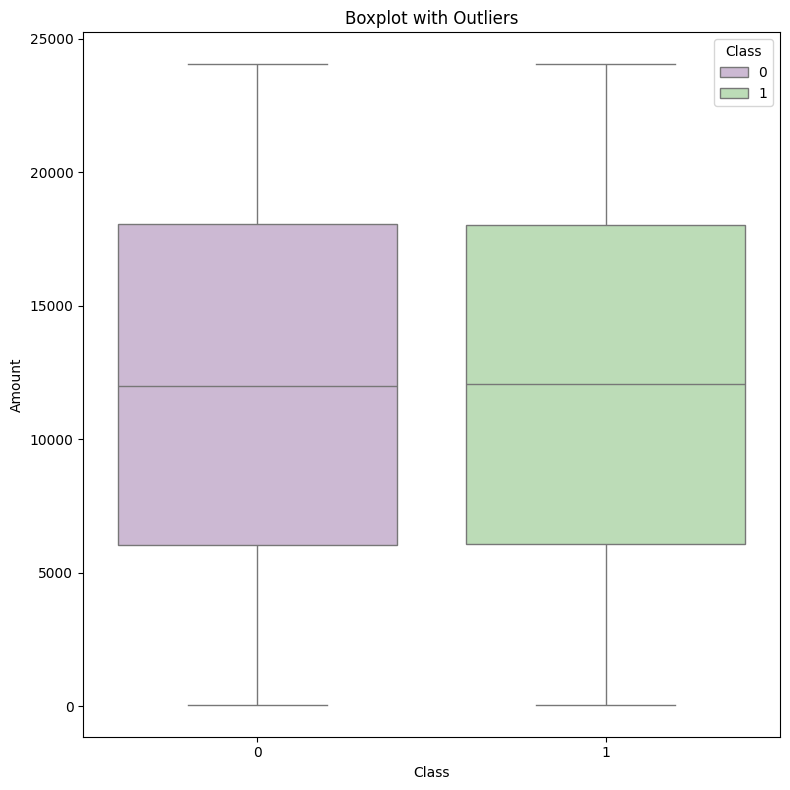

In [3]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))

sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=dados, palette="PRGn", showfliers=True)

ax1.set_title('Boxplot with Outliers')
ax1.set_xlabel('Class')
ax1.set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [4]:
print(dados.shape[0], dados.shape[1])

568630 31


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
dados = dados.drop(['id'], axis=1)

In [7]:
def fraude(x):
  if x == 0.0:
    return "Não Fraude"
  elif x == 1.0:
    return "Fraude"

In [8]:
dadosFiltrados = dados['Class'].apply(fraude)
dados['Class'] = dadosFiltrados
dados

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,Não Fraude
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,Não Fraude
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,Não Fraude
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,Não Fraude
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,Não Fraude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,Fraude
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,Fraude
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,Fraude
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,Fraude


In [9]:
x = dados.drop(['Class'], axis=1)
y = dados.Class

#Linear Regression

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [38]:
scaler = StandardScaler()

In [39]:
x_train_scaled = scaler.fit_transform(x_train)

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [42]:
preds_lr_train = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [43]:
preds_lr_train

array(['Não Fraude', 'Não Fraude', 'Não Fraude', ..., 'Não Fraude',
       'Não Fraude', 'Não Fraude'], dtype=object)

In [44]:
clas_rep = classification_report(y_test, preds_lr_train)
print(clas_rep)

              precision    recall  f1-score   support

      Fraude       1.00      0.26      0.41     84945
  Não Fraude       0.58      1.00      0.73     85644

    accuracy                           0.63    170589
   macro avg       0.79      0.63      0.57    170589
weighted avg       0.79      0.63      0.57    170589



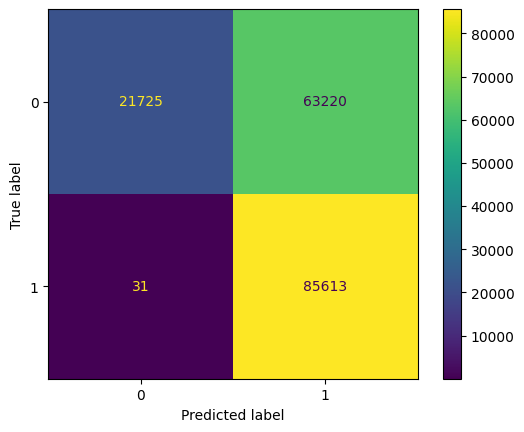

In [18]:
matriz = confusion_matrix(y_test, preds_lr_train)

matriz_display = ConfusionMatrixDisplay(matriz).plot()
matriz_display

#DecisionTree

In [19]:
dt_classifier = DecisionTreeClassifier()

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=73)

In [21]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
preds_dt_test = dt_classifier.predict(x_test)

In [23]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

[Text(0.37127749030511564, 0.9886363636363636, 'V14 <= -0.02\ngini = 0.5\nsamples = 341178\nvalue = [170497, 170681]\nclass = 1'),
 Text(0.07071875624469201, 0.9659090909090909, 'V4 <= -0.717\ngini = 0.048\nsamples = 154586\nvalue = [150807, 3779]\nclass = 0'),
 Text(0.01760503571963831, 0.9431818181818182, 'V10 <= -0.446\ngini = 0.344\nsamples = 1684\nvalue = [372, 1312]\nclass = 1'),
 Text(0.012009791677074487, 0.9204545454545454, 'V12 <= -0.746\ngini = 0.007\nsamples = 293\nvalue = [292, 1]\nclass = 0'),
 Text(0.010730878753059898, 0.8977272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.013288704601089074, 0.8977272727272727, 'gini = 0.0\nsamples = 292\nvalue = [292, 0]\nclass = 0'),
 Text(0.02320027976220213, 0.9204545454545454, 'V4 <= -0.779\ngini = 0.108\nsamples = 1391\nvalue = [80, 1311]\nclass = 1'),
 Text(0.01584653044911825, 0.8977272727272727, 'V4 <= -0.8\ngini = 0.018\nsamples = 1189\nvalue = [11, 1178]\nclass = 1'),
 Text(0.012649248139081781, 0

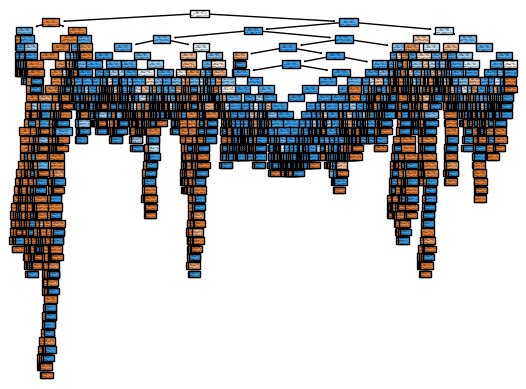

In [24]:
plot_tree(dt_classifier, feature_names=x_train.columns, class_names=['0', '1'], filled=True)

In [25]:
dt_rep = classification_report(y_test, preds_dt_test)
print(dt_rep)

              precision    recall  f1-score   support

      Fraude       1.00      1.00      1.00    113818
  Não Fraude       1.00      1.00      1.00    113634

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452



Utilizamos dois algoritmos de classificação, LogisticRegression e DecisionTree. O LogisticRegression obteve resultados satisfatórios, mas acusou um número maior de fraudes do que o real, enquanto o DecisionTree alcançou 100% de acurácia em todos os testes e provavelmente está com overfitting.